### EDA Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import altair as alt
from sklearn.model_selection import train_test_split

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')



RendererRegistry.enable('mimetype')

In [2]:
df = pd.read_csv("data/survey_results_public.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [4]:
def data_in_text(x):
    if type(x) is str:
        return 'data' in x
    else:
        return False

df_data = df[df['DevType'].apply(lambda x: data_in_text(x))]

In [5]:
df_data['Country'].value_counts()[:10]

United States of America                                853
Germany                                                 269
United Kingdom of Great Britain and Northern Ireland    235
India                                                   232
France                                                  158
Canada                                                  121
Brazil                                                  117
Poland                                                   91
Netherlands                                              88
Spain                                                    83
Name: Country, dtype: int64

In [6]:
# We are gonna consider Canada and United States in our case.

In [7]:
df_data = df_data.query("Country == 'United States of America' or Country == 'Canada'")


In [8]:
df_data.shape


(974, 79)

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 40 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      974 non-null    int64  
 1   MainBranch                      974 non-null    object 
 2   Employment                      974 non-null    object 
 3   RemoteWork                      958 non-null    object 
 4   CodingActivities                957 non-null    object 
 5   EdLevel                         973 non-null    object 
 6   LearnCode                       974 non-null    object 
 7   LearnCodeOnline                 697 non-null    object 
 8   LearnCodeCoursesCert            369 non-null    object 
 9   YearsCode                       967 non-null    object 
 10  YearsCodePro                    890 non-null    object 
 11  DevType                         974 non-null    object 
 12  OrgSize                         8

We are gonna chose the following columns

In [10]:
df_data.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [11]:
cols_to_choose = ['MainBranch',
'Employment',
'RemoteWork',
'EdLevel',
'YearsCode',
'YearsCodePro',
'DevType',
'OrgSize',
'Country',
'LanguageHaveWorkedWith',
'DatabaseHaveWorkedWith',
'PlatformHaveWorkedWith',
'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith',
'ToolsTechHaveWorkedWith',
'NEWCollabToolsHaveWorkedWith',
'OpSysProfessional use',
'VersionControlSystem',
'VCInteraction',
'OfficeStackAsyncHaveWorkedWith',
'Age',
'Ethnicity',
'WorkExp',
'ICorPM',
'ConvertedCompYearly']

In [12]:
dataset = df_data[cols_to_choose]

In [13]:
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=123)


train_df = train_df.dropna(subset=['ConvertedCompYearly'])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 3285 to 40291
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      569 non-null    object 
 1   Employment                      569 non-null    object 
 2   RemoteWork                      569 non-null    object 
 3   EdLevel                         569 non-null    object 
 4   YearsCode                       566 non-null    object 
 5   YearsCodePro                    568 non-null    object 
 6   DevType                         569 non-null    object 
 7   OrgSize                         569 non-null    object 
 8   Country                         569 non-null    object 
 9   LanguageHaveWorkedWith          568 non-null    object 
 10  DatabaseHaveWorkedWith          515 non-null    object 
 11  PlatformHaveWorkedWith          479 non-null    object 
 12  WebframeHaveWorkedWith         

In [14]:
import matplotlib.pyplot as plt

In [15]:
multianswerq_cols = [
'DevType',
'LanguageHaveWorkedWith',
'DatabaseHaveWorkedWith',
'PlatformHaveWorkedWith',
'WebframeHaveWorkedWith',
'MiscTechHaveWorkedWith',
'ToolsTechHaveWorkedWith',
'NEWCollabToolsHaveWorkedWith',
'OpSysProfessional use',
'VCInteraction',
'VersionControlSystem',
'OfficeStackAsyncHaveWorkedWith',
'Employment']

In [16]:
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=123)


train_df = train_df.dropna(subset=['ConvertedCompYearly'])

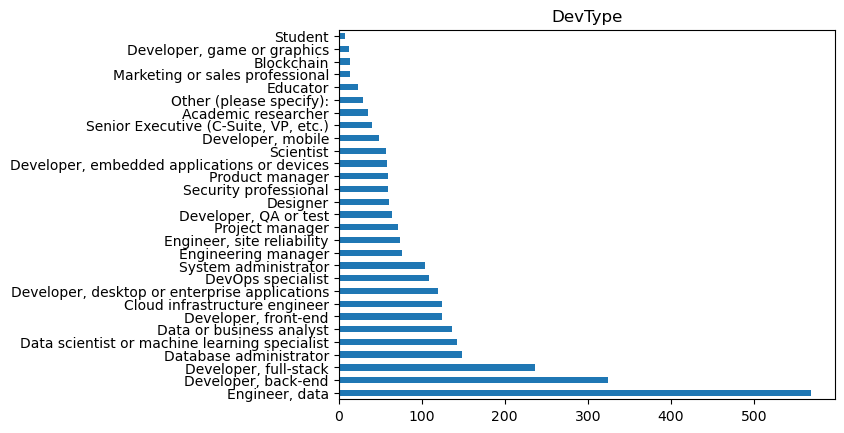

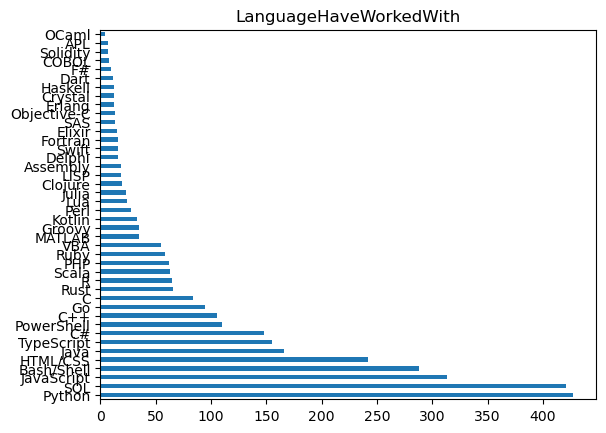

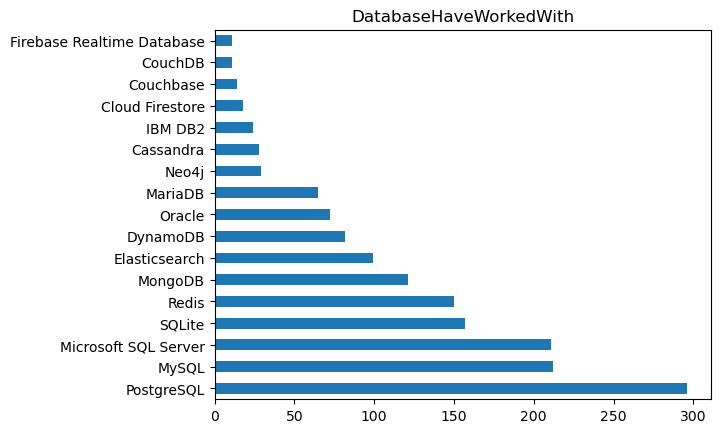

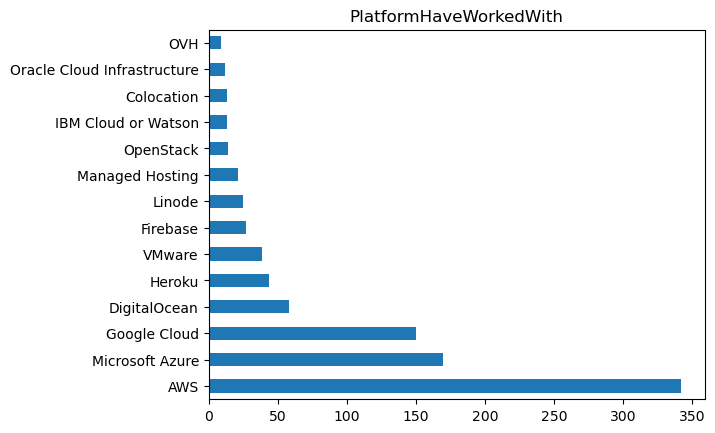

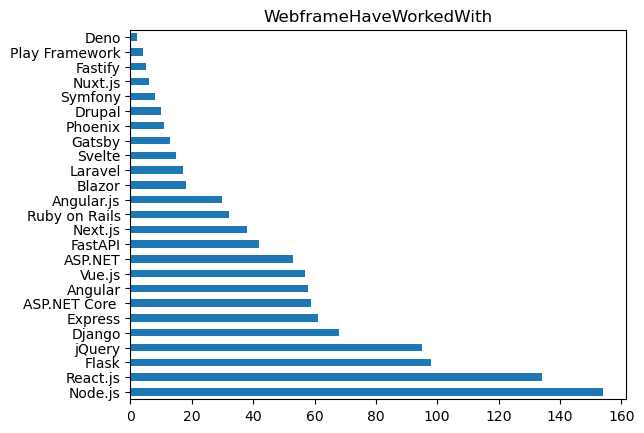

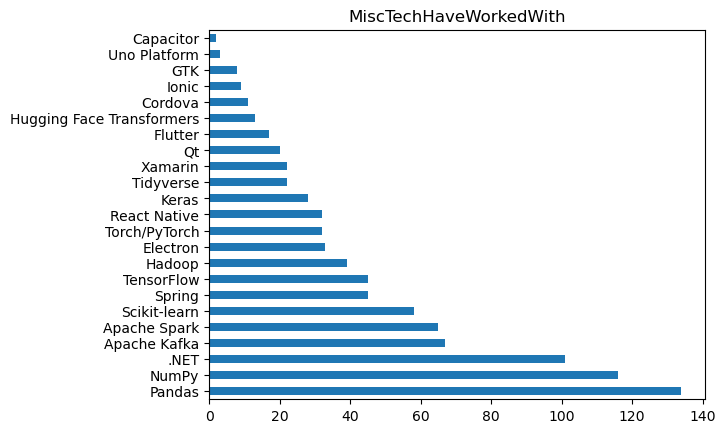

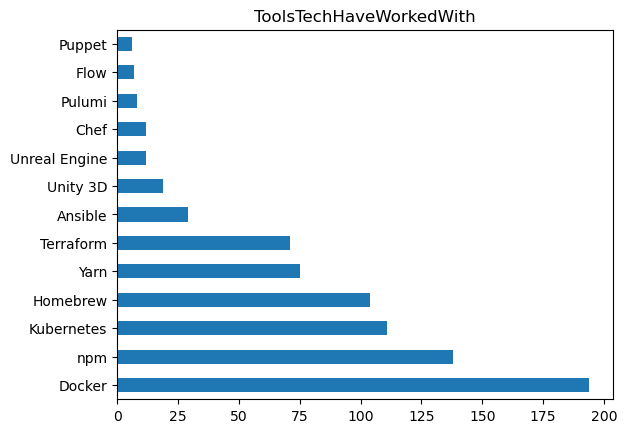

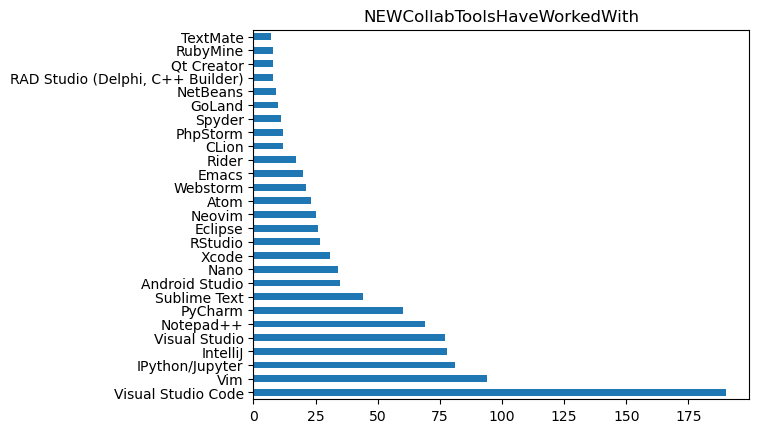

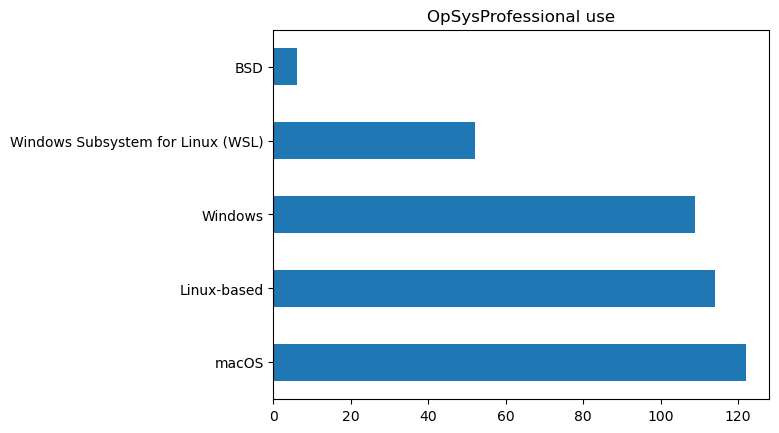

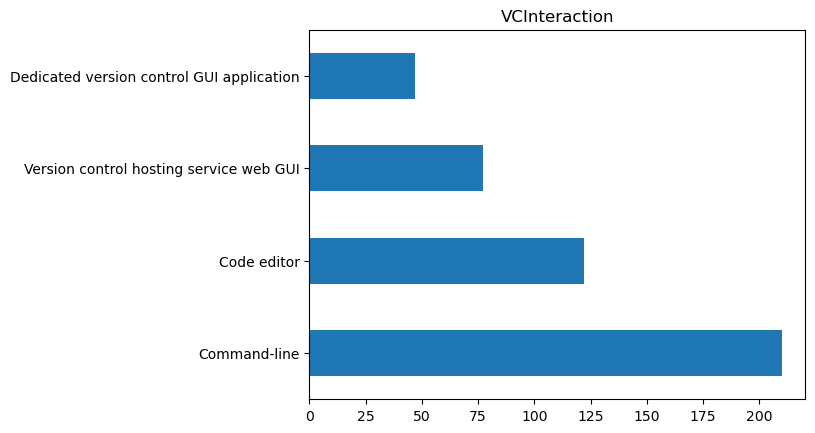

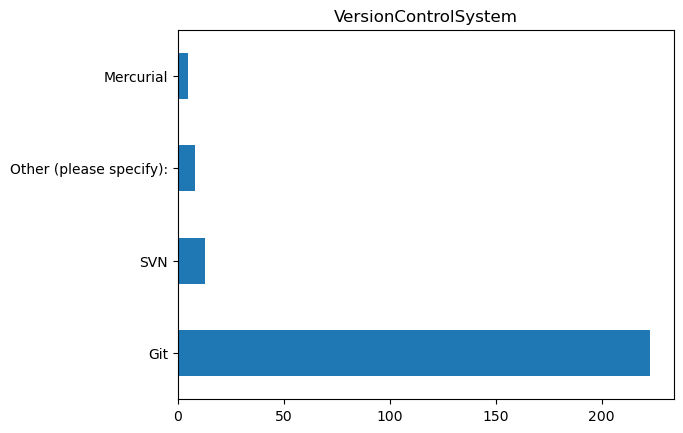

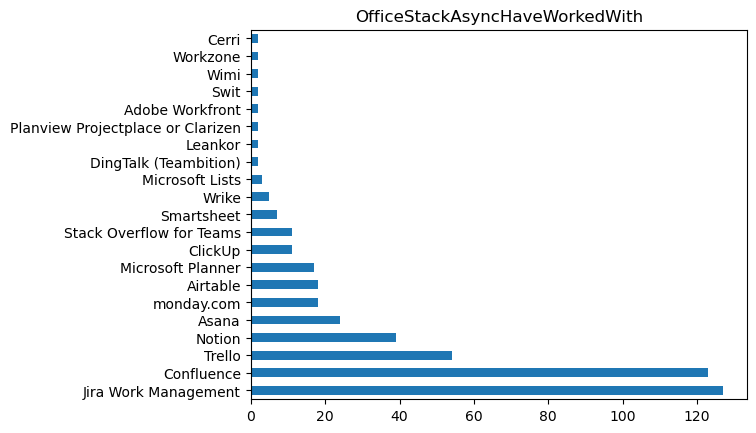

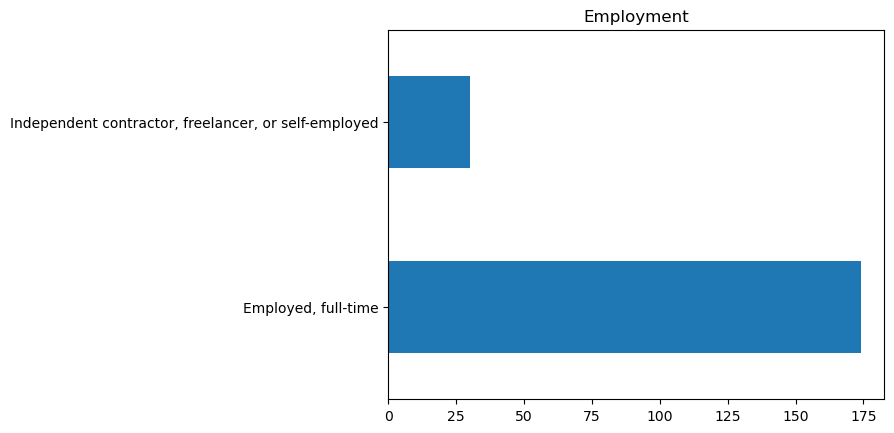

In [17]:
# only for plotting
plotting_dataset  = train_df.copy()
for col in multianswerq_cols:
    plotting_dataset = plotting_dataset.dropna(subset=[col])
    plotting_dataset[col] = plotting_dataset[col].apply(lambda x: x.split(';'))
    boom_data = plotting_dataset.explode(col)
    boom_data[col].value_counts().plot.barh(title = col)
    plt.show()
    

    

In [18]:
train_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith',
       'NEWCollabToolsHaveWorkedWith', 'OpSysProfessional use',
       'VersionControlSystem', 'VCInteraction',
       'OfficeStackAsyncHaveWorkedWith', 'Age', 'Ethnicity', 'WorkExp',
       'ICorPM', 'ConvertedCompYearly'],
      dtype='object')

In [19]:
set(train_df.columns) - set(multianswerq_cols)

{'Age',
 'ConvertedCompYearly',
 'Country',
 'EdLevel',
 'Ethnicity',
 'ICorPM',
 'MainBranch',
 'OrgSize',
 'RemoteWork',
 'WorkExp',
 'YearsCode',
 'YearsCodePro'}

In [20]:
def convert2float(x):
    if  x == 'More than 50 years' :
        return float(50)
    elif x == 'Less than 1 year':
        return float(0)
    else:
        return float(x)
    


In [21]:
train_df['YearsCode'] = train_df['YearsCode'].apply(lambda x: convert2float(x))

In [22]:
train_df['YearsCodePro'] = train_df['YearsCodePro'].apply(lambda x: convert2float(x))

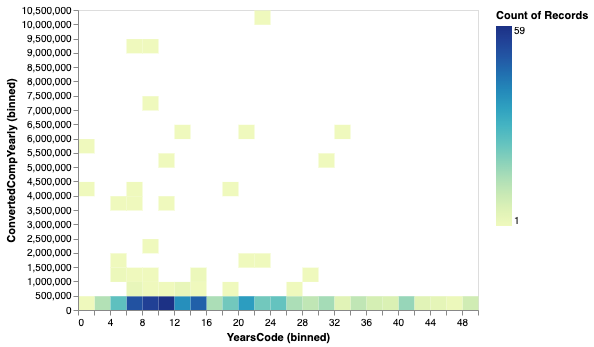

In [23]:
alt.Chart(train_df).mark_rect().encode(
    alt.X('YearsCode', bin=alt.Bin(maxbins=40)),
    alt.Y('ConvertedCompYearly', bin=alt.Bin(maxbins=40)),
    alt.Color('count()'))


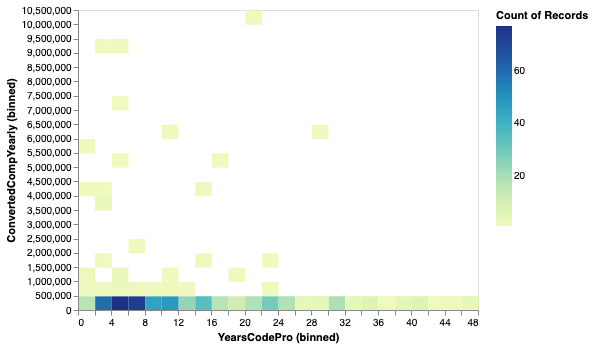

In [24]:
alt.Chart(train_df).mark_rect().encode(
    alt.X('YearsCodePro', bin=alt.Bin(maxbins=40)),
    alt.Y('ConvertedCompYearly', bin=alt.Bin(maxbins=40)),
    alt.Color('count()'))


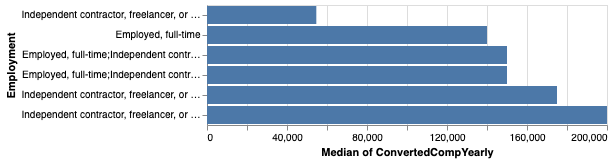

In [26]:
alt.Chart(train_df).mark_bar().encode(
    y=alt.Y('Employment', sort='x'),
    x='median(ConvertedCompYearly)'
)

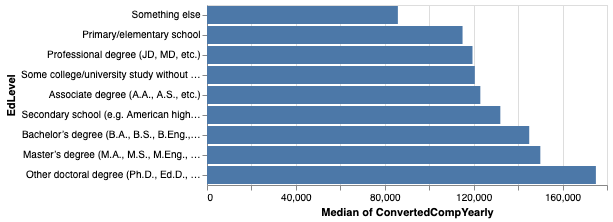

In [27]:
alt.Chart(train_df).mark_bar().encode(
    y=alt.Y('EdLevel', sort='x'),
    x='median(ConvertedCompYearly)'
)

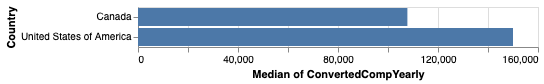

In [28]:


alt.Chart(train_df.dropna(subset=['ICorPM'])).mark_bar().encode(
    y=alt.Y('Country', sort='x'),
    x='median(ConvertedCompYearly)'
)

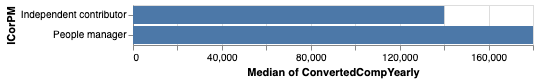

In [29]:


alt.Chart(train_df.dropna(subset=['ICorPM'])).mark_bar().encode(
    y=alt.Y('ICorPM', sort='x'),
    x='median(ConvertedCompYearly)'
)

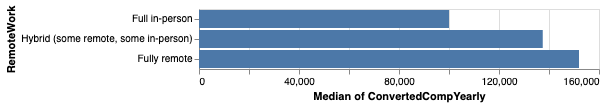

In [30]:
alt.Chart(train_df).mark_bar().encode(
    y=alt.Y('RemoteWork', sort='x'),
    x='median(ConvertedCompYearly)'
)

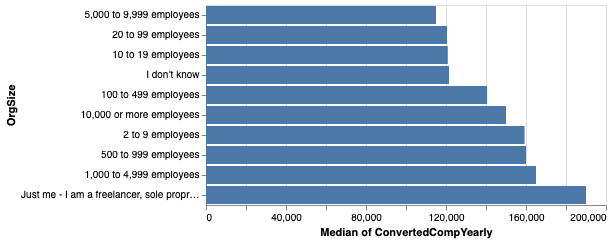

In [31]:
alt.Chart(train_df).mark_bar().encode(
    y=alt.Y('OrgSize', sort='x'),
    x='median(ConvertedCompYearly)'
)

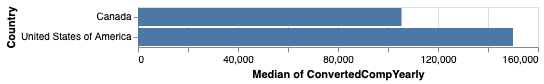

In [32]:
alt.Chart(train_df).mark_bar().encode(
    y=alt.Y('Country', sort='x'),
    x='median(ConvertedCompYearly)'
)

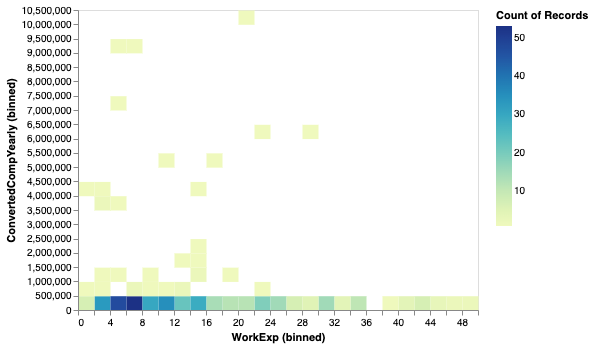

In [33]:
alt.Chart(train_df).mark_rect().encode(
    alt.X('WorkExp', bin=alt.Bin(maxbins=40)),
    alt.Y('ConvertedCompYearly', bin=alt.Bin(maxbins=40)),
    alt.Color('count()'))
